In [1]:
import llm # https://llm.datasette.io/en/stable/index.html
import rdflib
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph, rdflib_to_networkx_multidigraph
import pandas as pd
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import nltk

In [2]:
!cat TheMatrix.txt | llm 'Create a dictionary with keys sentences and values the extracted entities as triplets of subjects, relationships, and objects.' > TheMatrixData1.txt

In [3]:
def cleaning_predicates(s):
    '''
    This function excludes adverbs, prepositions, conjunctions etc. from being predicates.
    '''
    r=set(['RB', 'RBR', 'RBS', 'CC', 'IN'])
    if " " not in s:
        t=[]
        tt=[]
        words = nltk.word_tokenize(s)
        tagged_words = nltk.pos_tag(words)
        for word, tag in tagged_words:
            if tag in r:
                t.append((word,tag))
            else:
                tt.append(word)
        if len(t)==0 and len(tt)>0 and tt[0]!='to':
            return s
        if len(t)>0 and len(tt)==0:
            return ''
        else:
            return ''
    else:
        return '' 

data=[]
with open('TheMatrixData1.txt', 'r', encoding='utf-8') as f:
    for line in f:
        if '"subject": ' in line:
            line=line.replace('{','').replace('}','')
            line=line.split(", ")
            if len(line)>2:
                line=[x.replace('"subject": ',"").replace('"relationship": ',"").replace('"object": ',"").replace('"','').replace("\n","").replace("'","").replace(",","").strip() for x in line]
                if len(line[2])>0: 
                    if line[1]!="that":
                        if len(cleaning_predicates(line[1]))>0:
                            data.append(tuple(line))
df = pd.DataFrame(data, columns=["subject","predicate","object"])
df

,subject,predicate,object
0,police squad,corners,Trinity
1,Trinity,overpowers,police squad
2,Trinity,contacts,Neo
3,Trinity,tells,Neo
4,Trinity,has,answers
5,Trinity,seeks,Neo
6,they,fuse,his mouth
7,they,implant,a robotic bug
8,Neo,takes,the red pill
9,Neo,awakening,in a liquid-filled pod


In [4]:
ms,Ms=min([len(x) for x in df["subject"].tolist()]),max([len(x) for x in df["subject"].tolist()])
mp,Mp=min([len(x) for x in df["predicate"].tolist()]),max([len(x) for x in df["predicate"].tolist()])
mo,Mo=min([len(x) for x in df["object"].tolist()]),max([len(x) for x in df["object"].tolist()])

print("Length of strings in Subject: from %i to %i characters" %(ms,Ms))
print("Length of strings in Predicate: from %i to %i characters" %(mp,Mp))
print("Length of strings in Object: from %i to %i characters" %(mo,Mo))

# If one wants to shorten the labels of nodes in the plot of the knowledge graph:

cut_subject=20
cut_prdicate=20
cut_object=20

cut_df = df.loc[(df['subject'].astype(str).str.len() <= cut_subject) &
                (df['predicate'].astype(str).str.len() <= cut_prdicate) &
                (df['object'].astype(str).str.len() <= cut_object)]
    
cut_df

Length of strings in Subject: from 2 to 31 characters
Length of strings in Predicate: from 2 to 11 characters
Length of strings in Object: from 3 to 39 characters


,subject,predicate,object
0,police squad,corners,Trinity
1,Trinity,overpowers,police squad
2,Trinity,contacts,Neo
3,Trinity,tells,Neo
4,Trinity,has,answers
5,Trinity,seeks,Neo
6,they,fuse,his mouth
7,they,implant,a robotic bug
8,Neo,takes,the red pill
10,countless other pods,containing,other humans


police squad does not look like a valid URI, trying to serialize this will break.
countless other pods does not look like a valid URI, trying to serialize this will break.
a group of rebels does not look like a valid URI, trying to serialize this will break.
a group of rebels does not look like a valid URI, trying to serialize this will break.
the Agents does not look like a valid URI, trying to serialize this will break.
the group does not look like a valid URI, trying to serialize this will break.
the group does not look like a valid URI, trying to serialize this will break.
Agents and police does not look like a valid URI, trying to serialize this will break.
The Agents does not look like a valid URI, trying to serialize this will break.
a group of Sentinels does not look like a valid URI, trying to serialize this will break.


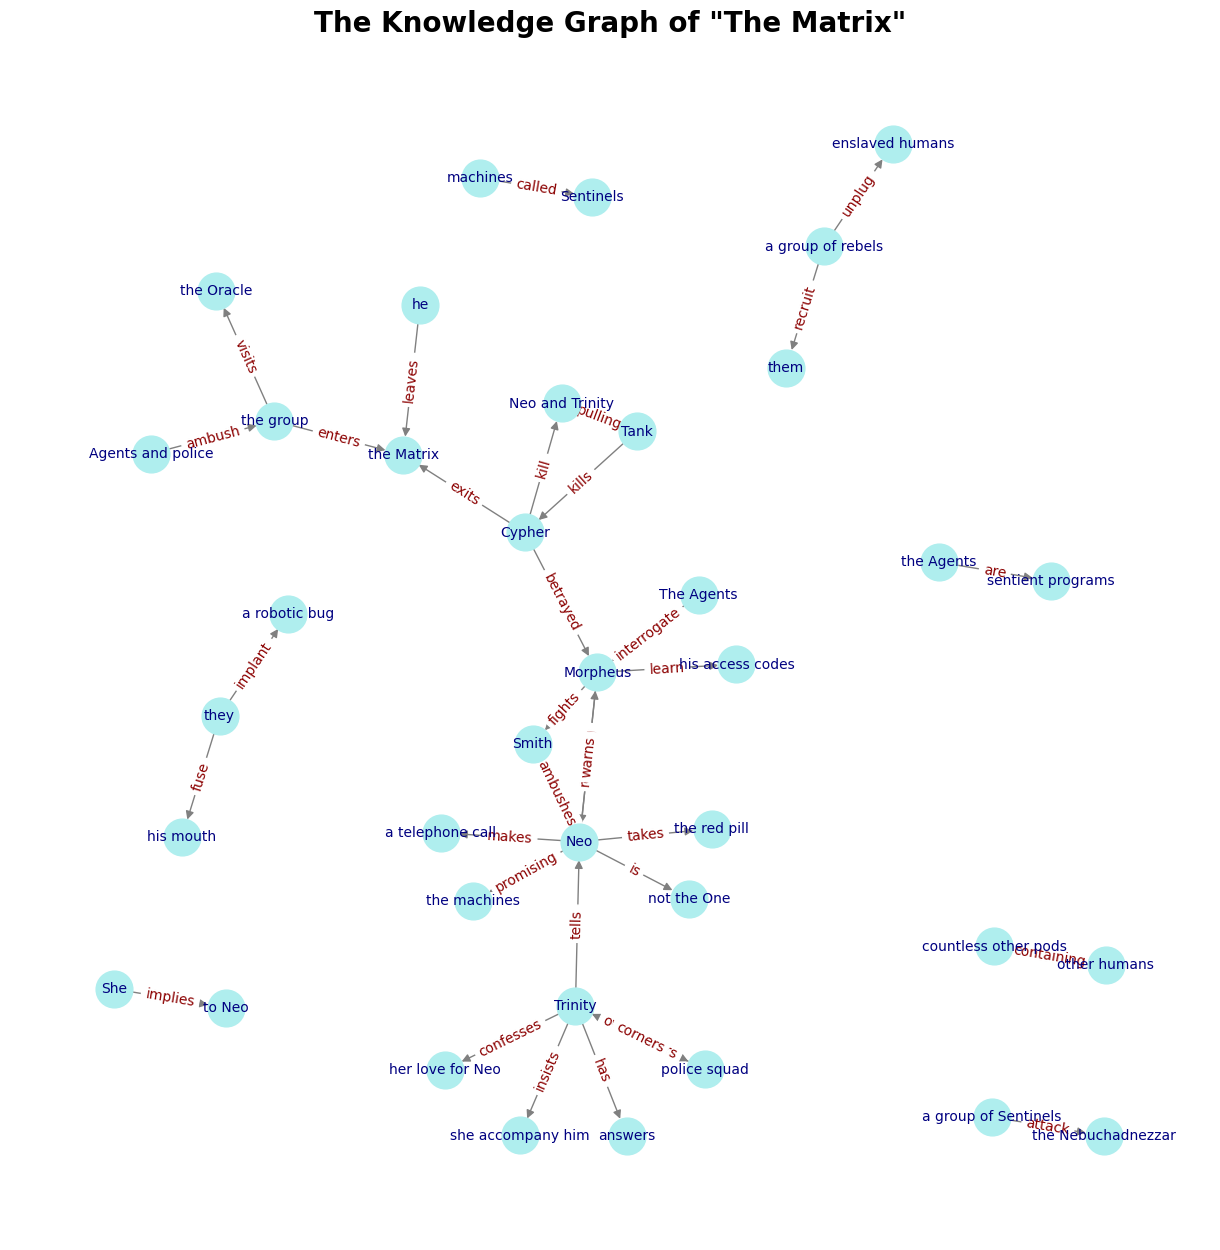

In [5]:
# Create the knowledge graph of the cut_df

g = Graph()
for index, row in cut_df.iterrows():
    subject = URIRef(row['subject'])
    predicate = URIRef(row['predicate'])
    obj = Literal(row['object'])
    g.add((subject, predicate, obj))

G = rdflib_to_networkx_digraph(g)
rnodes=G.nodes()
mapping = {n:str(n) for n in G.nodes()}  
G = nx.relabel_nodes(G, mapping)

labels={}
for e in G.edges(data=True):
    labels[(e[0],e[1])]=e[2]['triples'][0][1] 
labels={k:str(v) for k,v in labels.items()}

# Visualize the knowledge graph in matplotlib

plt.figure(figsize=(12, 12))
pos = graphviz_layout(G) 
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, arrowsize=12, node_color='paleturquoise', edge_color='gray',font_color='navy') #, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10,font_color='darkred') #label_pos=0.3,, verticalalignment='baseline'
plt.title('The Knowledge Graph of "The Matrix"',fontsize=20,fontweight='bold')
plt.show()